# Final Problem Set
## Problem 5D
Maxwell A. Fine, fall 2025

We are asked: Suppose $(x0, y0) = (10, 15)$ and $(σx, σy) = 1$. Make a plot of $p(m, x, |x0, y0$.

We are assuming that my solution for problem 5C i correct:

$$ \boxed{p(m, x |x_0, y_0)  \propto \exp (- \frac{(x_0 -x)^2}{2\sigma_x^2} - \frac{(y_0 -mx)^2}{2\sigma_y^2})} $$

We will 'normalize by hand'. 

In [3]:
# imports 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Marginal posterior p(m)
def p_m(m):
    return 1/np.sqrt(sigma_y**2 + m**2 * sigma_x**2) * \
           np.exp(-(y0 - m*x0)**2 / (2*(sigma_y**2 + m**2 * sigma_x**2)))

In [8]:
# Data
x0, y0 = 10, 15
sigma_x, sigma_y = 1, 1

# Grid for joint posterior
x = np.linspace(x0 - 5, x0 + 5, 200)
m = np.linspace(0, 3, 200)
X, M = np.meshgrid(x, m)

# Grid spacing
dx = x[1] - x[0]
dm = m[1] - m[0]

# Unnormalized joint posterior
joint = np.exp(-((x0 - X)**2 / (2*sigma_x**2) +
                  (y0 - M*X)**2 / (2*sigma_y**2)))

# Normalize
norm = np.sum(joint) * dx * dm
joint_norm = joint / norm



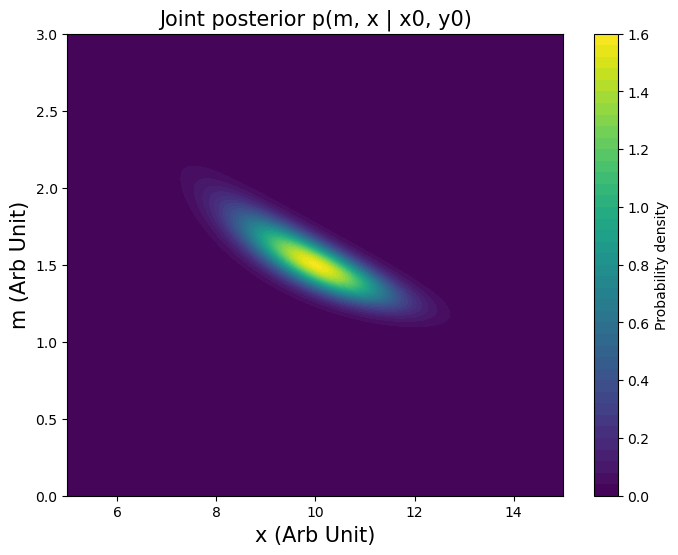

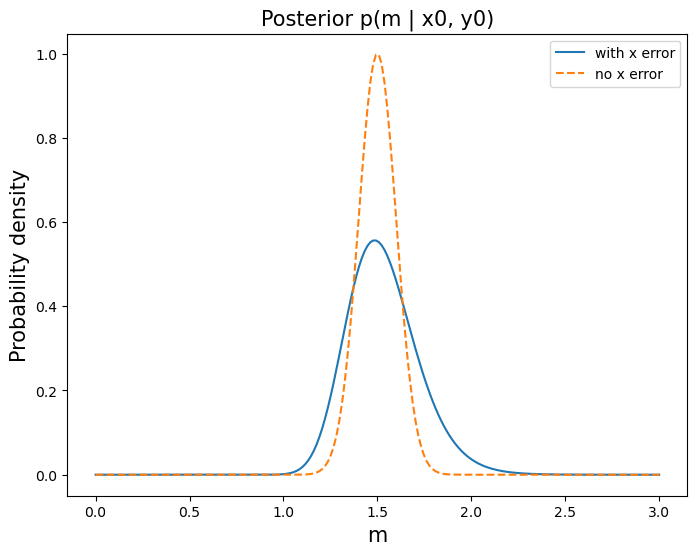

In [11]:
plt.figure(figsize=(8,6))
plt.contourf(X, M, joint_norm, levels=50, cmap='viridis')
plt.xlabel('x (Arb Unit)', size=15)
plt.ylabel('m (Arb Unit)', size=15)
plt.title('Joint posterior p(m, x | x0, y0)', size=15)
plt.colorbar(label='Probability density')
plt.savefig('problem_5.png', dpi=300, bbox_inches='tight')
plt.show()

p_m_vals = p_m(m)

plt.figure(figsize=(8,6))
plt.plot(m, p_m_vals, label='with x error')
# no x error
p_m_no_x = np.exp(-(y0 - m*x0)**2 / (2*sigma_y**2))
plt.plot(m, p_m_no_x, label='no x error', linestyle='--')
plt.xlabel('m', size=15)
plt.ylabel('Probability density', size=15)
plt.title('Posterior p(m | x0, y0)', size =15 )
plt.savefig('problem_5e.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()
